# 주식 가격 가져오기

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data_reader

## 삼성전자 주식 가격

In [27]:
SAMSUNG = data_reader.DataReader("005930.KS", data_source="yahoo")
SAMSUNG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-07,33000.0,32680.0,32940.0,32800.0,7661900.0,28155.212891
2016-11-08,32980.0,32700.0,32980.0,32880.0,5417450.0,28223.884766
2016-11-09,33140.0,31820.0,32920.0,31920.0,15683600.0,27399.830078
2016-11-10,33000.0,32360.0,32600.0,32980.0,11795350.0,28309.722656
2016-11-11,32360.0,31700.0,31700.0,31960.0,12836800.0,27434.169922


In [28]:
SAMSUNG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-29,71600.0,69700.0,71200.0,69800.0,17016151.0,69800.0
2021-11-01,70600.0,69900.0,70200.0,69900.0,11503729.0,69900.0
2021-11-02,72200.0,70700.0,70800.0,71500.0,16812570.0,71500.0
2021-11-03,71700.0,70100.0,71700.0,70400.0,12770428.0,70400.0
2021-11-04,71600.0,70700.0,71200.0,70800.0,8467958.0,70800.0


<AxesSubplot:xlabel='Date'>

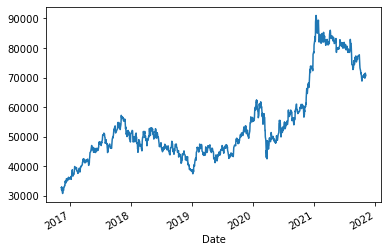

In [29]:
SAMSUNG['Close'].plot()

In [30]:
SAMSUNG.to_csv("SAMSUNG.csv")

## 일반 함수화

In [34]:
def get_stock_price(country, ticker):
    if country == "KR":
        df = data_reader.DataReader(ticker + ".KS", data_source="yahoo")
    elif country == "US":
        df = data_reader.DataReader(ticker, data_source="yahoo")
    return df

In [40]:
df = get_stock_price("US", "TSLA")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-04,38.692001,37.192001,37.799999,38.112000,25730000.0,38.112000
2016-11-07,38.858002,38.009998,38.717999,38.641998,19350500.0,38.641998
2016-11-08,39.498001,38.251999,38.757999,38.987999,16338000.0,38.987999
2016-11-09,38.400002,36.790001,37.375999,38.012001,40865500.0,38.012001
2016-11-10,38.321999,36.084000,38.209999,37.070000,33751500.0,37.070000


<AxesSubplot:xlabel='Date'>

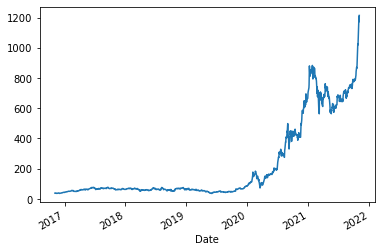

In [41]:
df['Close'].plot()

In [38]:
df = get_stock_price("KR", "005490") #포항제철
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-07,245000.0,240000.0,241000.0,244000.0,216560.0,203226.437500
2016-11-08,245500.0,242000.0,245500.0,242500.0,155334.0,201977.093750
2016-11-09,244000.0,226500.0,243500.0,231500.0,592440.0,192815.265625
2016-11-10,248500.0,236000.0,236500.0,247000.0,668966.0,205725.140625
2016-11-11,251000.0,241000.0,244500.0,249500.0,471654.0,207807.390625


## 여러 주식 종목의 가격 비교

In [58]:
tesla = get_stock_price("US", "TSLA")
ford = get_stock_price("US", "FORD")
apple = get_stock_price("US", "AAPL")
google = get_stock_price("US", "GOOGL")
sec = get_stock_price("KR", "005930")

### Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [61]:
tesla['normed Close'] = tesla['Close']/tesla['Close'][0]
ford['normed Close'] = ford['Close']/ford['Close'][0]
apple['normed Close'] = apple['Close']/apple['Close'][0]
google['normed Close'] = google['Close']/google['Close'][0]
sec['normed Close'] = sec['Close']/sec['Close'][0]

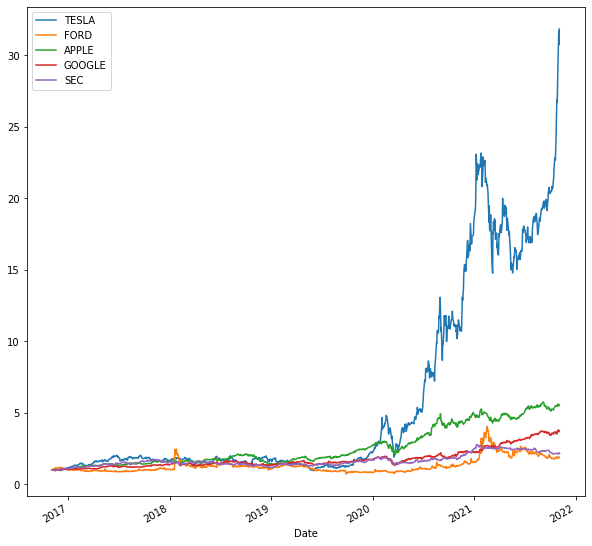

In [65]:
plt.figure(figsize=(10, 10))
tesla['normed Close'].plot(label='TESLA')
ford['normed Close'].plot(label='FORD')
apple['normed Close'].plot(label='APPLE')
google['normed Close'].plot(label='GOOGLE')
sec['normed Close'].plot(label='SEC')
plt.legend()